[Local](./ch02.ipynb),
[Github](https://github.com/renyuanL/_ryDsp2020/blob/master/code/ch02.ipynb),
[Colab](https://colab.research.google.com/github/renyuanL/_ryDsp2020/blob/master/code/ch02.ipynb)

## Ch02. Harmonics

textbook
[@Local](../textbook/harmonics.html)
[@Original](http://greenteapress.com/thinkdsp/html/thinkdsp003.html)


- Triangle waves
- Square waves
- Aliasing
- Computing the spectrum
- Exercises

In [ ]:
# If you run at your local machine, (Windows or Mac), please skip this cell

#
# But if you run at Colab, Read me first ...
#
# If you run at Colab, you need using Jupyter external OS command 'wget' to get 2 python modules,
# before you can successully import them.
# please remove '#' such that those !wget can be run in advance.
#
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"

# Chapter 2  Harmonics

In this chapter I present several new waveforms; we will look at their spectrums to understand their harmonic structure, which is the set of sinusoids they are made up of.

I’ll also introduce one of the most important phenomena in digital signal processing: aliasing. And I’ll explain a little more about how the Spectrum class works.

The code for this chapter is in chap02.ipynb, which is in the repository for this book (see Section 0.2). You can also view it at http://tinyurl.com/thinkdsp02.

## 2.1  Triangle waves

A sinusoid contains only one frequency component, so its spectrum has only one peak. More complicated waveforms, like the violin recording, yield DFTs with many peaks. In this section we investigate the relationship between waveforms and their spectrums.

![](../textbook/fg/thinkdsp006.png)

Figure 2.1: Segment of a triangle signal at 200 Hz.

- a wiki article about 
[Triangle wave](https://en.wikipedia.org/wiki/Triangle_wave)

![](https://upload.wikimedia.org/wikipedia/commons/4/4f/Triangle-td_and_fd.png)


- [hear it](https://upload.wikimedia.org/wikipedia/commons/d/df/220_Hz_anti-aliased_triangle_wave.ogg)

----

- doing some math about it

![](fg/fg_triangle.png)

----
![](fg/fg_triangle_2.png)

I’ll start with a triangle waveform, which is like a straight-line version of a sinusoid. 
Figure 2.1 shows a triangle waveform with frequency 200 Hz.

To generate a triangle wave, you can start with a `thinkdsp.TriangleSignal`:

```python
class TriangleSignal(Sinusoid):
    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = np.abs(frac - 0.5)
        ys = normalize(unbias(ys), self.amp)
        return ys
```

TriangleSignal inherits `__init__` from `class Sinusoid`, so it takes the same arguments: freq, amp, and offset.

The only difference is `def evaluate`. As we saw before, ts is the sequence of sample times where we want to evaluate the signal.

There are many ways to generate a triangle wave. The details are not important, but here’s how evaluate works:

- `cycles` is the number of cycles since the start time. 
- `np.modf` splits the number of cycles into the fraction part, stored in `frac`, and the integer part, which is ignored 1.

- `frac` is a sequence that ramps from 0 to 1 with the given frequency. 
    - Subtracting 0.5 yields values between -0.5 and 0.5. 
    - Taking the absolute value yields a waveform that `zig-zags` between 0.5 and 0.

- `unbias` shifts the waveform down so it is centered at 0; then 
- `normalize` scales it to the given amplitude, amp.

----

作者說來簡單，這裡卻大有學問，讓我們逐行來解析，甚至發展自己的版本來模仿及從中學習重要的技術。
We will develop a version of triangle signal by ourselves.


In [ ]:
import numpy as np
import thinkdsp
import scipy as sp

6%10, 16%10, 26%10, -6%10,-16%10, (-6)%(-10)


In [ ]:
0.6%1.0, 1.6%1.0, 2.6%1.0, -.6%1.0,-1.6%1.0

-  How do I type the Greek letter in Juputer code cell ?
- 希臘字母怎麼打進 Juputer code cell?
    - \pi    【Tab】 
    - \alpha 【Tab】
    - \beta  【Tab】

In [ ]:
π=1
α=2
β=3
π+α*β
甲= 10
乙= 20
年紀= 30
甲+乙+年紀

In [ ]:
import math
math.pi

import numpy
numpy.pi

π= numpy.pi

π


In [ ]:
π= np.pi
0.6%π, 1.6%π, 2.6%π, 3.6%π, 10.6%π, (10*π+0.1)%π

- 確認利用 % (mod) 求餘數，可以用在實數。 

In [ ]:
def ryTri(θ):
    
    θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)
    
    x0= θ *(-2/np.pi) +1
    x1= θ *(+2/np.pi) -3
    
    x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！
    
    return x


In [ ]:
import matplotlib.pyplot as pl

θ= np.linspace(0,10*np.pi, 10001)
x= ryTri(θ)
pl.plot(θ, x)
pl.grid('on')
pl.xlabel('θ (rad)')


In [ ]:
# x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

θ = np.linspace(0, 2*np.pi, 101)
θ

In [ ]:
θ<np.pi

In [ ]:
x0= θ *(-2/np.pi) +1
x0

In [ ]:
x0*(θ<np.pi) # 你會看到 (序列的後半段通通是 0)，亦即，僅前半段有效。

In [ ]:
# (後半段，同理可證！！)

In [ ]:
import thinkdsp as td
td.TriangleSignal??

我們剛才寫了一個類似 cos(θ) 的 triangle function, 

`tri(θ)` 

- 振幅= 1, 
- 週期= 2 π,

我們當然也可把它修改成，振幅 A = amp 、 頻率 f = freq、以及 夾帶一個起始相位  ϕ = offset 

In [ ]:
def ryTri(t, amp=1, freq=440, offset=0 ):
    
    θ= t * 2 * np.pi * freq + offset # 在此作橫軸之變數變換
    
    θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)
    
    x0= θ *(-2/np.pi) +1
    x1= θ *(+2/np.pi) -3
    
    x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！
    
    x= x *amp # 最後輸出前，再把縱軸拉到 振幅 = amp
    
    return x

如此就與作者所提供的 class TriangleSignal 有相同的行為。
以下測試看看。

In [ ]:
import matplotlib.pyplot as pl

t= np.linspace(0, (1/100)*3, 10000) # 畫 3 個週期
x= ryTri(t, freq= 100, amp=10, offset=0)
pl.plot(t,x)
pl.grid()

In [ ]:
x= ryTri(t, freq= 100, amp=10, offset=np.pi/2)
pl.plot(t,x)
pl.grid()

In [ ]:
import thinkdsp as td

y= td.TriangleSignal()
y.plot()
pl.grid()

- 以下，我們回到作者寫法：

```python
class TriangleSignal(Sinusoid):
    """Represents a triangle signal."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times

        returns: float wave array
        """
        ts = np.asarray(ts)
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles) # cycles % 1.0
        ys = np.abs(frac - 0.5)
        ys = normalize(unbias(ys), self.amp)
        return ys
```

- 1. 

首先，class TriangleSignal 繼承了 class Sinusoid 
(我們也記得 class Sinusoid 繼承 class Signal)

``` python
class Signal:
    def period(self):
    def plot(self, framerate=11025):
    def make_wave(self, duration=1, start=0, framerate=11025):

class Sinusoid(Signal):    
    def period(self):
    def evaluate(self, ts):

class TriangleSignal(Sinusoid):
    def evaluate(self, ts):
```

- 2.

最上層的 class Signal 並未定義 任何數學函數來計算信號的數值，

接下來 的 class Sinusoid 
利用 def evaluate 
來定義 數學函數為 np.sin 或 np.cos


- 3.

接下來的 class TriangleSignal 則是覆寫(overwrite) def evaluate:
運用一些數學推導，創造出三角波的形狀的數學函數。

- 4. 

作者使用的數學原理在此解析一下：



```python
ts = np.asarray(ts)
cycles = self.freq * ts + self.offset / PI2
frac, _ = np.modf(cycles)
ys = np.abs(frac - 0.5)
ys = normalize(unbias(ys), self.amp)
```

In [ ]:
# 查 3 個函數的意義:

#np.modf?
# equivalent to "x % 1.0" (有小數的實數，除以 1.0 的餘數)
# modf(+1.6) == +0.6
# modf(-1.6) == -0.6   (注意一下，-1.6 % 1.0 == +0.4)

#td.unbias?
# zero mean it

#td.normalize??
# scale the ampplitude into -amp, +amp




In [ ]:
np.modf(-1.9), (-1.9)%1.0

In [ ]:
# 逐行解析作者的演算法

import numpy as np
import thinkdsp as td
import matplotlib.pyplot as pl

ts= np.linspace(0,3,1000) # 設定時間序列為 0 ~ 3 sec (取1000點)

offset=0
freq=  1
amp=   2

t=       np.asarray(ts)
cycles=  freq * t + offset / (np.pi*2) #PI2

#frac, _= np.modf(cycles) # 逐行解析過程，發現此行有問題，在t 落於負值時有誤，需用下行修正之。

frac= cycles%1.0 # 除以 1.0，取餘數(=小數)，周而復始，週期性出現。週期 = 1.0 (cycle)

y0= frac - .5             # 圖形 下移 .5
y1= np.abs(y0)            # 取絕對值，負的部分翻上來
y2= td.unbias(y1)         # zero-mean y1
y3= td.normalize(y2, amp) # scaling to -amp ~ +amp

pl.plot(
    t, cycles,'r',
    t, frac,  'g',
    t, y0,    'b', 
    t, y1,    'c', 
    t, y2,    'm',
    t, y3,    'y'
    )

pl.grid()

- 解析過作者的 class TriangleSignal， 我們也來把自己寫的 def ryTri 改寫成 class RyTriSignal ...


In [ ]:
import numpy as np
from thinkdsp import Sinusoid

class RyTriSignal(Sinusoid):
    """ry Represents a triangle signal."""
    
    # 把原來的 class TriangleSignal 中的 def evaluate 改寫掉！！
    
    '''
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times

        returns: float wave array
        """
        ts = np.asarray(ts)
        
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = np.abs(frac - 0.5)
        ys = normalize(unbias(ys), self.amp)
        
        return ys
    '''
    
    # 把我們已寫好測試過的 函數 copy 過來，比對一下，做幾個語法上的修正。
    
    #def ryTri(t, amp=1, freq=440, offset=0 ):
    
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x0= θ *(-2/np.pi) +1
        x1= θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x

In [ ]:
x= RyTriSignal()
x.plot()

In [ ]:
w= x.make_wave()
w.make_audio()

- 大功告成！！

In [ ]:
s= w.make_spectrum()
s.plot()

import matplotlib.pyplot as pl
pl.grid()

Here’s the code that generates Figure 2.1:

In [ ]:
# 使用 作者 thinkdsp 的 class TriangleSignal
import thinkdsp

signal = thinkdsp.TriangleSignal(200)
signal.plot()

In [ ]:
# 使用自己的 class RyTriSignal

rySignal= RyTriSignal(freq= 200)
rySignal.plot()
pl.grid()

- 接下來再回到 教科書 提到的 三角信號的 頻譜....


![](../textbook/fg/thinkdsp007.png)

Figure 2.2: 
Spectrum of a triangle signal at 200 Hz, shown on two vertical scales. 
The version on the right cuts off the fundamental to show the harmonics more clearly.

- Next we can use the 【Signal】 to make a 【Wave】, and use the Wave to make a 【Spectrum】:


    - 【Signal】 --->【Wave】---> 【Spectrum】

In [ ]:
# 自己做做看，並可試著修正 參數 duration=  , framerate= 

wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()

pl.grid()

In [ ]:
# 看仔細一點...

In [ ]:
spectrum.plot(high=1500);pl.grid()

- 圖 2.2 的 一些觀察與解釋

- Figure 2.2 shows two views of the result; the view on the right is scaled to show the harmonics more clearly. 
    - As expected, the highest peak is at the fundamental frequency, 200 Hz, and there are additional peaks at harmonic frequencies, which are integer multiples of 200.

- But one `surprise` is that there are `no peaks at the even multiples`: 400, 800, etc. 
    - The harmonics of a triangle wave are `all odd multiples` of the fundamental frequency, in this example 600, 1000, 1400, etc.

- Another feature of this spectrum is the relationship between the amplitude and frequency of the harmonics. Their amplitude `drops off` in proportion to `frequency squared`. 
    - For example the frequency ratio of the first two harmonics (200 and 600 Hz) is 3, and the amplitude ratio is approximately 9. The frequency ratio of the next two harmonics (600 and 1000 Hz) is 1.7, and the amplitude ratio is approximately 1.72 = 2.9. This relationship is called the harmonic structure.
    
- 目前我們僅靠 數值計算、作圖、觀察，得到上述結論。在學到 DFT 時，會用理論來演繹。

## 2.2  Square waves


![](../textbook/fg/thinkdsp008.png)

Figure 2.3: Segment of a square signal at 100 Hz.

[Square wave @Wikipedia](https://en.wikipedia.org/wiki/Square_wave)

[hear it @1KHz](https://upload.wikimedia.org/wikipedia/commons/9/92/Square_wave_1000.ogg)

- `thinkdsp` also provides `SquareSignal`, which represents a square signal. 
Here’s the class definition:

```python
class SquareSignal(Sinusoid):
    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = self.amp * np.sign(unbias(frac))
        return ys
```

Like `class TriangleSignal`, `class SquareSignal` inherits `def __init__` from `class Sinusoid`, so it takes the same parameters.

And the `def evaluate` method is similar. 
Again, `cycles` is the number of cycles since the start time, 
and `frac` is the fractional part, which ramps from 0 to 1 each period.

`unbias` shifts frac so it ramps from -0.5 to 0.5, 
then `np.sign` maps the negative values to -1 and the positive values to 1. 
Multiplying by `amp` yields a square wave that jumps between -amp and amp.

![](fg/fg_square01.png)

- Let's write our own square signal class as follows....

In [ ]:
from thinkdsp import Sinusoid
import numpy as np


class RySqrSignal(Sinusoid):
    """ry Represents a square signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x0= -1 #上半周 #θ *(-2/np.pi) +1
        x1= +1 #下半周 #θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x

In [ ]:
x= RySqrSignal(freq=100)
x.plot()

In [ ]:
w= x.make_wave()
w.make_audio()


In [ ]:
spec= w.make_spectrum()
spec.plot()

![](../textbook/fg/thinkdsp009.png)

Figure 2.4: Spectrum of a square signal at 100 Hz.

- Figure 2.3 shows three periods of a square wave with frequency 100 Hz
- Figure 2.4 shows its spectrum.

Like a triangle wave, the square wave contains `only odd harmonics`, 
which is why there are peaks at 300, 500, and 700 Hz, etc. 
But the amplitude of the harmonics `drops off more slowly`. 

Specifically, amplitude drops in proportion to frequency (not frequency squared).

The exercises at the end of this chapter give you a chance 
to explore other waveforms and other harmonic structures.

In [ ]:
spec.plot(high=1000)

# to see the x axis in more detail, use, pl.xticks()
pl.xticks(np.arange(0,1000,100))
pl.grid()

# you will see spectrum peaks 
# at the frequency= 100, 300,500,700,900 Hz, 
# all odd multiples

In [ ]:
# 比較一下，三角波形方波形的頻譜。(在相同的基本頻率  freq=100 之下)
import thinkdsp as td
import matplotlib.pyplot as pl


xTri= td.TriangleSignal(freq=100)
xSqr= td.SquareSignal(freq=100)

In [ ]:
xTri.plot()
pl.grid()

In [ ]:
xSqr.plot()
pl.grid()

In [ ]:
# The spectrum of TriangleSignal

xTri.make_wave().make_spectrum().plot(high=1000)
pl.grid()

In [ ]:
# The spectrum of SquareSignal

xSqr.make_wave().make_spectrum().plot(high=1000)
pl.grid()

## 2.3  [Aliasing](https://en.wikipedia.org/wiki/Aliasing)



In signal processing and related disciplines, `aliasing` is an effect that causes different signals to become `indistinguishable` (or aliases of one another) when sampled. 

It also often refers to the distortion or artifact that results when a signal reconstructed from samples is different from the original continuous signal.

----
[@GoogleTranslate](https://translate.google.com/?source=gtx_m#view=home&op=translate&sl=en&tl=ja&text=alias)

- a false or assumed identity.
- used to indicate that a named person is also known or more familiar under another specified name.
- misidentify (a signal frequency), introducing distortion or error.

- 別名 alias, pseudonym, pen name, nom de plume
- 通称 alias, popular name, nickname
- 別称 alias, pseudonym, pen name
- 仮名 pseudonym, Kana, alias, Japanese syllabary, pen name, nom de plume

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

π= np.pi

ω1= π * 1/4
ω2= π * 9/4  # ω2= ω1 + π*2

t= np.linspace(0,10, 10001)
x1= np.cos(ω1 * t)
x2= np.cos(ω2 * t)

pl.plot(t,x1,'r',t,x2,'b')
pl.grid()


In [ ]:
n= np.arange(0,11)

x1= np.cos(ω1 * n)
x2= np.cos(ω2 * n)

pl.figure()
pl.stem(n,x1,'r',use_line_collection=True)
pl.grid()

pl.figure()
pl.stem(n,x2,'b',use_line_collection=True)
pl.grid()

- we can see that 
    - $\omega_1 \ne \omega_2$
    - $cos(\omega_1 t) \ne cos(\omega_2 t), \text{for all } t \in RealNumber $
- but, 
    - if $\omega_2 = \omega_1 + 2 \pi$
    - $cos(\omega_1 n) = cos(\omega_2 n), \text{for all } n \in IntegerNumber $


- That is to say... 
- we `cannot discriminate` $\omega_1$ and $\omega_2$, although they are different,
- by observing $cos(\omega_1 n)$ and $cos(\omega_2 n)$

In [ ]:
t= np.linspace(0, 10, 1001)

x1t= np.cos(ω1 * t)

x2t= np.cos(ω2 * t)

n= np.arange(0, 11)

x1n= np.cos(ω1 * n)

pl.figure()

pl.plot(t,x1t,'red', t, x2t,'lightblue')

pl.stem(n,x1n,'green',use_line_collection=True)
pl.grid()


- In addtion to the above $ω_1$, $ω_2$, 
- there is another frequency $ω_3$,
- which has the same sampled value at integer $n$


In [ ]:
t= np.linspace(0, 10, 1001)
n= np.arange(0, 11)

x1t= np.cos(ω1 * t)
x2t= np.cos(ω2 * t)
x1n= np.cos(ω1 * n)

pl.figure()
pl.plot(t,x1t,'red', t, x2t,'lightblue')
pl.stem(n,x1n,'green',use_line_collection=True)

# In addtion to the above ω1, ω2, 
# there is another frequency ω3,
# which has the same sampled value at integer n

ω3 = π * 7/4  # ω3 = - ω1 + 2 π

x3t= np.cos(ω3 * t)
pl.plot(t,x3t,'orange')

pl.grid()

- To sum up, for `discrete-time` `sinusoidal` signal, the frequencies will be called aliases to each other, as long as they have the following relationship:
    - 
$
    \omega_k = \omega_0 + k*2\pi 
$

- for `cosine` signal,  the following are also aliasing frequencies
    - 
    $\omega_m = (-\omega_0) + m*2\pi $

- for `sine` signal,  the following are also aliasing frequencies
    - 
    $\omega_n = (\pi-\omega_0) + n*2\pi $

- To avoid the  aliasing effect, we can increase the `Sampling Rate`.
- Theoratically, the Sampling Rate should be at least 2 times the signal frequency.
- Do an experiment in the following ....


In [ ]:
ω1= π * 1/4 
ω2= π * 9/4  # ω2= ω1 + π*2

f1= ω1/(2*π)
f2= ω2/(2*π)

f1, f2

In [ ]:
T= 10

t= np.linspace(0, T, 1001)


x1t= np.cos(ω1 * t)
x2t= np.cos(ω2 * t)

Fs= 1 #  changing Fs to be 2,5,10
Ts= 1/Fs

n= np.arange(0, T*Fs+1)
x1n= np.cos(ω1 * n * Ts)
x2n= np.cos(ω2 * n * Ts) 

pl.figure()
pl.plot(t, x1t, 'red', 
        t, x2t,'lightblue')

pl.stem(n*Ts, x1n, 
        linefmt='g', markerfmt='go', use_line_collection=True)
pl.stem(n*Ts, x2n, 
        linefmt='b', markerfmt='bx', use_line_collection=True)

pl.grid()


In [ ]:
# for sine signal, with 3 different frequencies
# ω1, ω2, ω3

t= np.linspace(0, 10, 1001)
n= np.arange(0, 11)

x1t= np.sin(ω1 * t)
x2t= np.sin(ω2 * t)
x1n= np.sin(ω1 * n)

pl.figure()
pl.plot(t,x1t,'red', t, x2t,'lightblue')
pl.stem(n,x1n,'green',use_line_collection=True)

# In addtion to the above ω1, ω2, 
# there is another frequency ω3,
# which has the same sampled value at integer n

ω3 = π * 7/4  # ω3 = - ω1 + 2 π

x3t= np.sin(ω3 * t + π) #= sin(ω3(t+Δt)), with a time shift (Δt = π/ω3 = 4/7)
pl.plot(t,x3t,'orange')

pl.grid()

![](fg/fg_aliasing_2.png)

![](fg/fg_aliasing_3.png)

- What is the relationships between 【original frequency】, 【Sampling Rate】, and the 【reconstructed frequency】?

![](fg/fg_aliasing_4.png)

In [ ]:
import thinkdsp as td
import matplotlib.pyplot as pl

f1=      500
Fs=    20000
s= td.CosSignal(freq= f1)
s.plot();pl.grid()

In [ ]:
w= s.make_wave(framerate=Fs)
w.make_spectrum().plot();pl.grid()

w.make_audio()

In [ ]:
import thinkdsp as td
f2=    20500
Fs=    20000
s= td.CosSignal(freq= f2)
#s.plot();pl.grid()

w= s.make_wave(framerate=Fs)
w.make_spectrum().plot();pl.grid()
w.make_audio()

In [ ]:
import thinkdsp as td
f3=    19500
Fs=    20000
s= td.CosSignal(freq= f3)
#s.plot();pl.grid()

w= s.make_wave(framerate=Fs)
w.make_spectrum().plot();pl.grid()
w.make_audio()

In [ ]:
import thinkdsp as td
f3=    19000
Fs=    20000
s= td.CosSignal(freq= f3)
#s.plot();pl.grid()

w= s.make_wave(framerate=Fs)
w.make_spectrum().plot();pl.grid()
w.make_audio()

![](../textbook/fg/thinkdsp010.png)

Figure 2.5: 

Spectrum of a triangle signal at 1100 Hz sampled at 10,000 frames per second. 
The view on the right is scaled to show the harmonics.

----

I have a confession. I chose the examples in the previous section carefully to avoid showing you something confusing. But now it’s time to get confused.

Figure 2.5 shows the spectrum of a triangle wave at 1100 Hz, sampled at 10,000 frames per second. Again, the view on the right is scaled to show the harmonics.

The harmonics of this wave should be at 3300, 5500, 7700, and 9900 Hz. In the figure, there are peaks at 1100 and 3300 Hz, as expected, but the third peak is at 4500, not 5500 Hz. The fourth peak is at 2300, not 7700 Hz. And if you look closely, the peak that should be at 9900 is actually at 100 Hz. 


- `What’s going on?`

In [ ]:
# Let's do an experiment by ourselves
import thinkdsp as td

x= td.TriangleSignal(freq= 1100)
w= x.make_wave(framerate= 10000)
s= w.make_spectrum()
s.plot()

pl.grid()


In [ ]:
# To look into the detail, 
# I use some pyplot utility before plot the spectrum


pl.figure(figsize=(15,5))
pl.xticks(np.arange(0,5000,200))
pl.grid()

s.plot()






![](fg/fg_aliasing.png)

The problem is that when you evaluate the signal at discrete points in time, you lose information about what happened between samples. For low frequency components (e.g., freq= 100Hz), 
that’s not a problem, because you have `lots of samples per period`.

But if you sample a signal at `5000` Hz (freq= 5000, very HIGH) with `10,000` frames per second, 
you only have `two samples per period`. 
That turns out to be enough, just barely, 
but if the frequency is higher, it’s not.

To see why, let’s generate cosine signals at 4500 and 5500 Hz, and sample them at 10,000 frames per second:

```python
framerate = 10000

signal = thinkdsp.CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()

signal = thinkdsp.CosSignal(5500)
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()
```



In [ ]:
import thinkdsp

sig4500 = thinkdsp.CosSignal(4500)

sig4500.plot(framerate=1000000) 
# to approximate the signal in continuous signal, 
# let framerate be very large
# here, we can set it be 1,000,000 per sec

pl.grid()

In [ ]:
framerate= 10000
duration = sig4500.period*3

seg4500=   sig4500.make_wave(duration, framerate=framerate)
seg4500.plot(marker= 'o', linestyle='--', color='r')
pl.grid()

In [ ]:
# overlap the above 2 plots at a figure...

sig4500.plot(framerate=1000000)
seg4500.plot(marker= 'o', linestyle='--', color='r')
pl.grid()

In [ ]:
# do the same things for another frequency (5500 Hz)
sig5500 = thinkdsp.CosSignal(5500)
sig5500.plot(framerate=1000000)
pl.grid()


In [ ]:
framerate= 10000
duration = sig5500.period*3

seg5500= sig5500.make_wave(duration, framerate=framerate)
seg5500.plot(marker= 'x', linestyle=':', color='g')
pl.grid()


In [ ]:
# overlap the above 2 plots at a figure...

sig5500.plot(framerate=1000000)
seg5500.plot(marker= 'x', linestyle=':', color='g')
pl.grid()

In [ ]:
# plot them all in a figure and look into them in detail...

pl.figure(figsize=(10,5))

sig4500.plot(framerate=1000000)
sig5500.plot(framerate=1000000)

seg4500.plot(marker= 'o', linestyle='--', color='r')
seg5500.plot(marker= 'x', linestyle=':', color='g')

pl.grid()


- Ry does some interpretation about the above plot.....

- a short description: 
    - taking samples at sampling rate = `10000 samples/sec` (the red or green lines)
    - cannot discriminate between `sig4500` (dark blue) and `sig5500` (light blue).

- The following is what the author (Allen) explained...

![](../textbook/fg/thinkdsp011.png)

Figure 2.6: 
- Cosine signals at 4500 and 5500 Hz, sampled at 10,000 frames per second. 
- The `signals are different`, but the `samples are identical`.


Figure 2.6 shows the result. 


Allen plotted the Signals with thin gray lines and the samples using vertical lines, to make it easier to compare the two Waves. The problem should be clear: even though the Signals are different, the Waves are identical!

When we sample a 5500 Hz signal at 10,000 frames per second, the result is indistinguishable from a 4500 Hz signal. For the same reason, a 7700 Hz signal is indistinguishable from 2300 Hz, and a 9900 Hz is indistinguishable from 100 Hz.

This effect is called `aliasing` 

that means when the high frequency signal is sampled, 
it appears to be a low frequency signal.

In this example, the `highest frequency we can measure` is 5000 Hz, which is `half the sampling rate`. 

Frequencies above 5000 Hz are folded back below 5000 Hz, 
which is why this threshold is sometimes called the “folding frequency”. 

It is sometimes also called the `Nyquist frequency`. See http://en.wikipedia.org/wiki/Nyquist_frequency.

The folding pattern continues if the aliased frequency goes below zero. 

For example, the 5th harmonic of the 1100 Hz triangle wave is at 12,100 Hz. 
Folded at 5000 Hz, it would appear at -2100 Hz, but it gets folded again at 0 Hz, back to 2100 Hz. 
In fact, you can see a small peak at 2100 Hz in Figure 2.4, and the next one at 4300 Hz.

----

[Aliasing @Wiki](https://en.wikipedia.org/wiki/Aliasing)

- Two different sinusoids that fit the same set of samples.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/AliasingSines.svg/300px-AliasingSines.svg.png)

## 2.4  Computing the spectrum

We have seen the `class Wave` has a method `def make_spectrum` several times. 
Here is the implementation (leaving out some details we’ll get to later):

```python
from np.fft import rfft, rfftfreq

class Wave:
    
    def make_spectrum(self):
        n = len(self.ys)
        d = 1 / self.framerate

        hs = rfft(self.ys)
        fs = rfftfreq(n, d)

        return Spectrum(hs, fs, self.framerate)
```

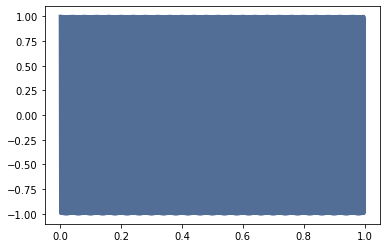

In [6]:
import thinkdsp as td

s= td.CosSignal()
w= s.make_wave()
w.plot()
w.make_audio()

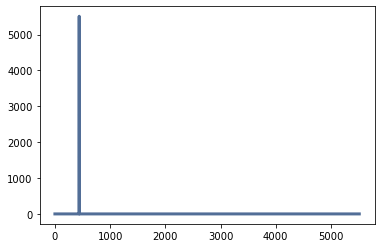

In [7]:
s= w.make_spectrum()
s.plot()

In [8]:
# dir(s)
'''
 'framerate', 'freq_res',
 'fs',        'hs',
 'imag',      'real',
 'amps',      'angles'
'''
s.framerate, s.freq_res,\
s.fs,        s.hs,      \
s.real,      s.imag,    \
s.amps,      s.angles

(11025,
 1.0000907111756168,
 array([0.000e+00, 1.000e+00, 2.000e+00, ..., 5.510e+03, 5.511e+03,
        5.512e+03]),
 array([ 1.98711382e-12+0.00000000e+00j,  2.02534046e-12+6.78371706e-13j,
         1.13857438e-12+1.84231883e-12j, ...,
        -8.89808761e-13-1.50598915e-12j,  8.05310161e-13+8.59827898e-13j,
         1.67138808e-12-2.68747132e-12j]),
 array([ 1.98711382e-12,  2.02534046e-12,  1.13857438e-12, ...,
        -8.89808761e-13,  8.05310161e-13,  1.67138808e-12]),
 array([ 0.00000000e+00,  6.78371706e-13,  1.84231883e-12, ...,
        -1.50598915e-12,  8.59827898e-13, -2.68747132e-12]),
 array([1.98711382e-12, 2.13592887e-12, 2.16575397e-12, ...,
        1.74921782e-12, 1.17806132e-12, 3.16481282e-12]),
 array([ 0.        ,  0.32319771,  1.01723818, ..., -2.10445829,
         0.81812714, -1.014416  ]))

In [9]:
import numpy as np
np.fft?

Background information
----------------------

Fourier analysis is fundamentally a method for expressing a function as a
`sum of periodic components`, and for recovering the function from those
components.  When both the function and its Fourier transform are
replaced with discretized counterparts, it is called the discrete Fourier
transform (DFT).  

The DFT has become a mainstay of numerical computing in
part because of a very fast algorithm for computing it, called the Fast
Fourier Transform (FFT), which was known to Gauss (1805) and was brought
to light in its current form by Cooley and Tukey [CT]_.  Press et al. [NR]_
provide an accessible introduction to Fourier analysis and its
applications.

Because the discrete Fourier transform separates its input into
components that contribute at discrete frequencies, it has a great number
of applications in digital signal processing, e.g., for filtering, and in
this context the discretized input to the transform is customarily
referred to as a `signal`, which exists in the `time domain`.  

The output is called a `spectrum` or `transform` and exists in the `frequency
domain`.

[Definition @ Wikipedia](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)

The discrete Fourier transform transforms a sequence of N complex numbers 

$ \left\{\mathbf {x_{n}} \right\}:=x_{0},x_{1},\ldots ,x_{N-1}$

into another sequence of complex numbers, 

$ \left\{\mathbf {X_{k}} \right\}:=X_{0},X_{1},\ldots ,X_{N-1},$

which is defined by

$ {\begin{aligned}X_{k}&=\sum _{n=0}^{N-1}x_{n}\cdot e^{-{\frac {i2\pi }{N}}kn}\\&=\sum _{n=0}^{N-1}x_{n}\cdot \left[\cos \left({\frac {2\pi }{N}}kn\right)-i\cdot \sin \left({\frac {2\pi }{N}}kn\right)\right],\end{aligned}}$

where the last expression follows from the first one by `Euler's formula`.

![](fg/fg_expCircle.PNG)

![](fg/fg_dft.png)

Implementation details
----------------------

There are many ways to define the DFT, varying in the `sign` of the `exponent`, `normalization`, etc.  

In this implementation, the `(N-point) DFT` is defined as

$
\text{for } k= 0,\ldots,N-1
\\   
X_k =  \sum_{n=0}^{N-1}  \left(e^{-j{2\pi \over N}}\right)^{kn} \cdot x_n  
$

In [ ]:
import numpy as np
np.fft.fft??

In [11]:
import numpy as np
np.set_printoptions(precision=3, floatmode='fixed')

x= np.eye(2)
X= np.fft.fft(x)
fftMatrix= X
x, X, fftMatrix

(array([[1.000, 0.000],
        [0.000, 1.000]]), array([[ 1.000+0.000j,  1.000+0.000j],
        [ 1.000+0.000j, -1.000+0.000j]]), array([[ 1.000+0.000j,  1.000+0.000j],
        [ 1.000+0.000j, -1.000+0.000j]]))

In [12]:
x= np.eye(3)
X= np.fft.fft(x)
fftMatrix= X
fftMatrix

array([[ 1.000+0.000j,  1.000+0.000j,  1.000+0.000j],
       [ 1.000+0.000j, -0.500-0.866j, -0.500+0.866j],
       [ 1.000+0.000j, -0.500+0.866j, -0.500-0.866j]])

In [13]:
x= np.eye(4)
X= np.fft.fft(x)
fftMatrix= X
x 
fftMatrix

array([[ 1.000+0.000j,  1.000+0.000j,  1.000+0.000j,  1.000+0.000j],
       [ 1.000+0.000j,  0.000-1.000j, -1.000+0.000j,  0.000+1.000j],
       [ 1.000+0.000j, -1.000+0.000j,  1.000+0.000j, -1.000+0.000j],
       [ 1.000+0.000j,  0.000+1.000j, -1.000+0.000j,  0.000-1.000j]])

In [23]:
π=   np.pi
N=4
np.exp(-1j*2*π/N)

(6.123233995736766e-17-1j)

In [22]:
(3+4j) * (5+6j)

(-9+38j)

In [24]:
np.exp(-1j*2*π/N *0), \
np.exp(-1j*2*π/N *1), \
np.exp(-1j*2*π/N *2), \
np.exp(-1j*2*π/N*3)

((1+0j),
 (6.123233995736766e-17-1j),
 (-1-1.2246467991473532e-16j),
 (-1.8369701987210297e-16+1j))

$
n=0,1,2,3\\
....\\
k=0 ,\\
e^{-j*2\pi/4*k*n} =e^{-j*2\pi/4*0*n} =(+1, +1, +1, +1)\\
k=1 , \\
e^{-j*2\pi/4*k*n} =e^{-j*2\pi/4*1*n} =(+1, -j, -1, +j)\\
k=2 , \\
e^{-j*2\pi/4*k*n} =e^{-j*2\pi/4*2*n} =(+1, -1, +1, -1)\\
k=3 , \\
e^{-j*2\pi/4*k*n} =e^{-j*2\pi/4*3*n} =(+1, +j, -1, -j)\\
$

The transformation matrix $W$ 

can be defined as
$ W=\left[{\omega^{nk}}\right]_{n,k=0,\ldots , N-1}$,

or equivalently:

$ 
W={
\begin{bmatrix}
    1      & 1          & 1         & 1         & \cdots & 1\\
    1      & \omega     &\omega^{2} &\omega^{3} &\cdots  &\omega^{N-1}   \\
    1      & \omega^{2} &\omega^{4} &\omega^{6} &\cdots  &\omega^{2(N-1)}\\
    1      & \omega^{3} &\omega^{6} &\omega^{9} &\cdots  &\omega^{3(N-1)}\\
    \vdots & \vdots     &\vdots     &\vdots     &\ddots  &\vdots \\
    1      & \omega^{N-1} &\omega^{2(N-1)} &\omega^{3(N-1)} &\cdots &\omega^{(N-1)(N-1)}\\
\end{bmatrix}}
$


where, 

$ \omega =e^{-j {2\pi \over N}}$



In [27]:
N= 32
n= np.arange(N)
x= np.cos(n/4 *2*π) #+ np.cos(n/8 *2*π) + np.cos(n/16 *2*π)

X= np.fft.fft(x)
x, X

(array([ 1.000e+00,  6.123e-17, -1.000e+00, -1.837e-16,  1.000e+00,
         3.062e-16, -1.000e+00, -4.286e-16,  1.000e+00,  5.511e-16,
        -1.000e+00, -2.450e-15,  1.000e+00, -9.803e-16, -1.000e+00,
        -2.695e-15,  1.000e+00, -7.354e-16, -1.000e+00, -2.940e-15,
         1.000e+00, -4.905e-16, -1.000e+00, -3.185e-15,  1.000e+00,
        -2.455e-16, -1.000e+00, -3.430e-15,  1.000e+00, -6.190e-19,
        -1.000e+00, -3.675e-15]),
 array([-2.052e-14+0.000e+00j,  3.207e-15-6.295e-15j,
        -2.702e-15-3.962e-15j, -1.790e-15-1.217e-16j,
        -1.295e-16-1.256e-15j, -2.172e-15-2.055e-15j,
        -3.240e-15-2.816e-16j, -4.185e-15-5.590e-16j,
         1.600e+01-1.745e-14j,  4.185e-15-5.590e-16j,
         3.240e-15-2.816e-16j,  2.172e-15-2.055e-15j,
         1.295e-16-1.256e-15j,  1.790e-15-1.217e-16j,
         2.702e-15-3.962e-15j, -3.207e-15-6.295e-15j,
         2.052e-14+0.000e+00j, -3.207e-15+6.295e-15j,
         2.702e-15+3.962e-15j,  1.790e-15+1.217e-16j,
         1.295e-16

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


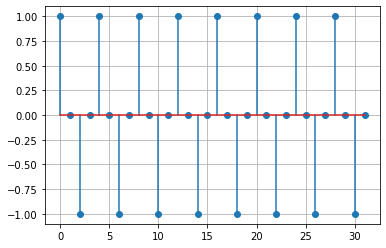

In [28]:
import matplotlib.pyplot as pl
pl.stem(x);pl.grid()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


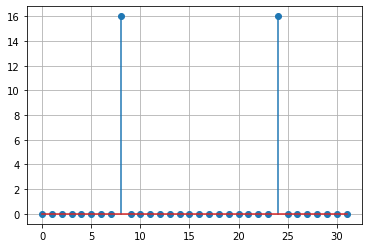

In [29]:
pl.stem(np.abs(X));pl.grid()

In [30]:
#np.fft.fftfreq?
Fs= 100
N=  100
_fftfreq= np.fft.fftfreq(N,1/Fs)
_rfftfreq= np.fft.rfftfreq(N,1/Fs)
_fftfreq, _rfftfreq


(array([  0.000,   1.000,   2.000,   3.000,   4.000,   5.000,   6.000,
          7.000,   8.000,   9.000,  10.000,  11.000,  12.000,  13.000,
         14.000,  15.000,  16.000,  17.000,  18.000,  19.000,  20.000,
         21.000,  22.000,  23.000,  24.000,  25.000,  26.000,  27.000,
         28.000,  29.000,  30.000,  31.000,  32.000,  33.000,  34.000,
         35.000,  36.000,  37.000,  38.000,  39.000,  40.000,  41.000,
         42.000,  43.000,  44.000,  45.000,  46.000,  47.000,  48.000,
         49.000, -50.000, -49.000, -48.000, -47.000, -46.000, -45.000,
        -44.000, -43.000, -42.000, -41.000, -40.000, -39.000, -38.000,
        -37.000, -36.000, -35.000, -34.000, -33.000, -32.000, -31.000,
        -30.000, -29.000, -28.000, -27.000, -26.000, -25.000, -24.000,
        -23.000, -22.000, -21.000, -20.000, -19.000, -18.000, -17.000,
        -16.000, -15.000, -14.000, -13.000, -12.000, -11.000, -10.000,
         -9.000,  -8.000,  -7.000,  -6.000,  -5.000,  -4.000,  -3.000,
      

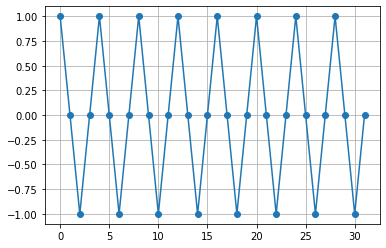

In [34]:
#np.fft.rfft?

pl.plot(x,'o-');pl.grid()

In [35]:
X= np.fft.fft(x)
X

array([-2.052e-14+0.000e+00j,  3.207e-15-6.295e-15j,
       -2.702e-15-3.962e-15j, -1.790e-15-1.217e-16j,
       -1.295e-16-1.256e-15j, -2.172e-15-2.055e-15j,
       -3.240e-15-2.816e-16j, -4.185e-15-5.590e-16j,
        1.600e+01-1.745e-14j,  4.185e-15-5.590e-16j,
        3.240e-15-2.816e-16j,  2.172e-15-2.055e-15j,
        1.295e-16-1.256e-15j,  1.790e-15-1.217e-16j,
        2.702e-15-3.962e-15j, -3.207e-15-6.295e-15j,
        2.052e-14+0.000e+00j, -3.207e-15+6.295e-15j,
        2.702e-15+3.962e-15j,  1.790e-15+1.217e-16j,
        1.295e-16+1.256e-15j,  2.172e-15+2.055e-15j,
        3.240e-15+2.816e-16j,  4.185e-15+5.590e-16j,
        1.600e+01+1.745e-14j, -4.185e-15+5.590e-16j,
       -3.240e-15+2.816e-16j, -2.172e-15+2.055e-15j,
       -1.295e-16+1.256e-15j, -1.790e-15+1.217e-16j,
       -2.702e-15+3.962e-15j,  3.207e-15+6.295e-15j])

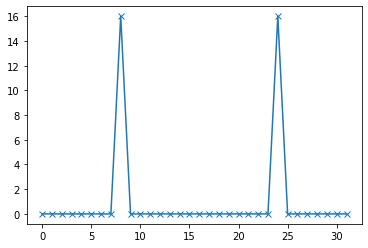

In [40]:
pl.plot(X,'x-')

The parameter 
`self` is a Wave object. 
`n` is the number of samples in the wave, 
and `d` is the inverse of the frame rate, which is the time between samples.

`np.fft` is the NumPy module that provides functions related to the `Fast Fourier Transform (FFT)`, 
which is an efficient algorithm that computes the `Discrete Fourier Transform (DFT)`.

`def make_spectrum` uses `rfft`, which stands for “real FFT”, because the Wave contains real values, not complex.

Later we’ll see the full FFT, which can handle complex signals (see Section 7.9). 
The result of rfft, which I call `hs`, is a NumPy array of complex numbers that represents the amplitude and phase offset of each frequency component in the wave.

The result of `rfftfreq`, which I call `fs`, is an array that contains frequencies corresponding to the `hs`.

To understand the values in `hs`, consider these two ways to think about complex numbers:

A complex number is the sum of a `real part` and an `imaginary part`, 
often written $x + iy$ = $x + jy$, 
where $i$ or $j$ is the imaginary unit, 
$ i = j = \sqrt{-1}$

You can think of $x$ and $y$ as `Cartesian coordinates`.

A complex number is also the product of a magnitude and a complex exponential, 

$A e^{j φ}$, 

where A is the magnitude and φ is the `angle in radians`, also called the `“argument”`. 
You can think of A and φ as `Polar coordinates`.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Polar_graph_paper.svg/300px-Polar_graph_paper.svg.png)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Polar_to_cartesian.svg/250px-Polar_to_cartesian.svg.png)



Each value in hs corresponds to a frequency component: its magnitude is proportional to the amplitude of the corresponding component; its angle is the phase offset.

The `class Spectrum` inherits `class _SpectrumParent`, 
which provides two read-only properties, 
`amps` and `angles`, 
which return NumPy arrays representing the magnitudes and angles of the hs. 

```python
class _SpectrumParent:
    """Contains code common to Spectrum and DCT.
    """

    def __init__(self, hs, fs, framerate, full=False):
        """Initializes a spectrum.

        hs: array of amplitudes (real or complex)
        fs: array of frequencies
        framerate: frames per second
        full: boolean to indicate full or real FFT
        """
        self.hs = np.asanyarray(hs)
        self.fs = np.asanyarray(fs)
        self.framerate = framerate
        self.full = full


    @property
    def max_freq(self):
        """Returns the Nyquist frequency for this spectrum."""
        return self.framerate / 2

    @property
    def amps(self):
        """Returns a sequence of amplitudes (read-only property)."""
        return np.absolute(self.hs)
```

```python
class Spectrum(_SpectrumParent):
    """Represents the spectrum of a signal."""
    
    @property
    def real(self):
        """Returns the real part of the hs (read-only property)."""
        return np.real(self.hs)

    @property
    def imag(self):
        """Returns the imaginary part of the hs (read-only property)."""
        return np.imag(self.hs)

    @property
    def angles(self):
        """Returns a sequence of angles (read-only property)."""
        return np.angle(self.hs)
```

When we plot a Spectrum object, we usually plot `amps` versus `fs`. 

Sometimes it is also useful to plot `angles` versus `fs`.

Although it might be tempting to look at the real and imaginary parts of hs, you will almost never need to. 

I encourage you to think of the DFT as a vector of amplitudes and phase offsets that happen to be encoded in the form of complex numbers.

To modify a Spectrum, you can access the `hs` directly. For example:

```python
    spectrum.hs *= 2
    spectrum.hs[spectrum.fs > cutoff] = 0
```

- The first line multiplies the elements of hs by 2, which doubles the amplitudes of all components. 
- The second line sets to 0 only the elements of hs where the corresponding frequency exceeds some cutoff frequency.

But Spectrum also provides methods to perform these operations:

```python
spectrum.scale(2)
spectrum.low_pass(cutoff)
```

```python
class Spectrum(_SpectrumParent):
    
    def scale(self, factor):
        """Multiplies all elements by the given factor.

        factor: what to multiply the magnitude by (could be complex)
        """
        self.hs *= factor

    def low_pass(self, cutoff, factor=0):
        """Attenuate frequencies above the cutoff.

        cutoff: frequency in Hz
        factor: what to multiply the magnitude by
        """
        self.hs[abs(self.fs) > cutoff] *= factor
```        
You can read the documentation of these methods and others at http://greenteapress.com/thinkdsp.html.

At this point you should have a better idea of how the `class Signal`, `class Wave`, and `class Spectrum` work together, but I have not explained how the `Fast Fourier Transform (FFT)` works. 

That will take a few more chapters.

## 2.5  Exercises

Solutions to these exercises are in `chap02soln.ipynb`.

### Exercise 1   

If you use Jupyter, load [chap02.ipynb](./chap02.ipynb) and try out the examples. You can also view the notebook at http://tinyurl.com/thinkdsp02.

### Exercise 2   

A [sawtooth signal](http://en.wikipedia.org/wiki/Sawtooth_wave) has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave

Write a class called SawtoothSignal that extends Signal and provides evaluate to evaluate a sawtooth signal.

Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves?

![](https://upload.wikimedia.org/wikipedia/commons/8/82/Sawtooth-td_and_fd.png)


- The piecewise linear function

$ x(t)=t-\underbrace {\lfloor t\rfloor } _{\operatorname {floor} (t)}$, 

based on the `floor function` of time t


- or equivalently,

$ x(t)=t{\pmod {1.0}}$, 

is an example of a sawtooth wave with period 1.0

----

In [1]:
# [rySol]

from thinkdsp import Sinusoid
import numpy as np

#
# copy these 2 for references...
#
# class RyTriSignal(Sinusoid):
# class RySqrSignal(Sinusoid):
#

#'''
class RyTriSignal(Sinusoid):
    """ry Represents a triangle signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x0= θ *(-2/np.pi) +1
        x1= θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x

class RySqrSignal(Sinusoid):
    """ry Represents a square signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x0= -1 #上半周 #θ *(-2/np.pi) +1
        x1= +1 #下半周 #θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x       
#'''


class RySawtoothSignal(Sinusoid):
    """ry Represents a sawtooth signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x= -1 + θ/np.pi # 從 -1 開始爬坡，上半週期到達　0,下半周期到達 +1 
       
        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x

![](fg/fg_sawtooth.png)

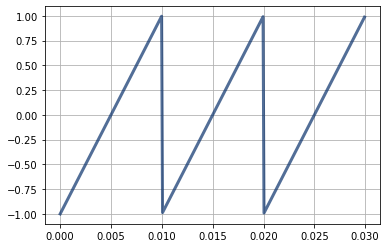

In [3]:
# Let's test what we have created
import matplotlib.pylab as pl

x= RySawtoothSignal(freq=100)
x.plot()
pl.grid()

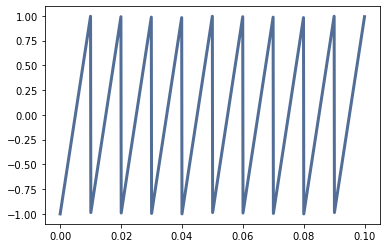

In [4]:
# see and hear it

w= x.make_wave()
w.segment(duration=.1).plot()
w.make_audio()


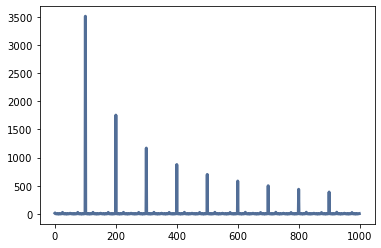

In [5]:
# make its spectrum

s= w.make_spectrum()
s.plot(high=1000)

# you will see the spectrum has both odd and even multiples of 100 Hz


### Exercise 3   

Make a square signal at 1100 Hz and make a wave that samples it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?

In [ ]:
import thinkdsp as td

x= td.CosSignal(freq=1100) 
w= x.make_wave(framerate=10000)
s= w.make_spectrum()
s.plot()
w.make_audio()

In [ ]:
x= td.TriangleSignal(freq=1100) 
w= x.make_wave(framerate=10000)
s= w.make_spectrum()
s.plot()
w.make_audio()

In [ ]:
x= td.SquareSignal(freq=1100) 
w= x.make_wave(framerate=10000)
s= w.make_spectrum()
s.plot()
w.make_audio()

In [ ]:
x= td.SawtoothSignal(freq=1100) 
w= x.make_wave(framerate=10000)
s= w.make_spectrum()
s.plot()
w.make_audio()

### Exercise 4   

If you have a spectrum object, spectrum, and print the first few values of spectrum.fs, you’ll see that they start at zero. So spectrum.hs[0] is the magnitude of the component with frequency 0. But what does that mean?
Try this experiment:

Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
Make a Spectrum object and print spectrum.hs[0]. What is the amplitude and phase of this component?
Set spectrum.hs[0] = 100. What effect does this operation have on the waveform? Hint: Spectrum provides a method called make_wave that computes the Wave that corresponds to the Spectrum.

In [ ]:
import matplotlib.pyplot as pl
import thinkdsp as td

x= td.CosSignal(freq=1100) 
w= x.make_wave(framerate=10000)
s= w.make_spectrum()
s.plot()
s.hs[0]

In [ ]:
s.hs[0]=5000
s.plot()

In [ ]:
w0= s.make_wave()
w0.plot()
# you will see the min and max of the waveform was raised up 
# and the center of the amplitude was raised from 0 to 0.5

In [ ]:
w.plot() # this is the original for comparison

### Exercise 5   

Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Hint: since division by zero is undefined, you might want to set spectrum.hs[0] = 0.
Test your function using a square, triangle, or sawtooth wave.

Compute the Spectrum and plot it.

Modify the Spectrum using your function and plot it again.

Use Spectrum.make_wave to make a Wave from the modified Spectrum, and listen to it. What effect does this operation have on the signal?

### Exercise 6   

Triangle and square waves have odd harmonics only; 
the sawtooth wave has both even and odd harmonics. 

The harmonics of the square and sawtooth waves drop off in proportion to 1/f; 
the harmonics of the triangle wave drop off like $1/f^2$. 

Can you find a waveform that has even and odd harmonics that drop off like $1/f^2$?

- Hint: There are two ways you could approach this: 
    - you could construct the signal you want by adding up sinusoids, 
    - or you could start with a signal that is similar to what you want and modify it.

In [ ]:
#[rySol01]

xSqr= RySqrSignal(freq= 100)
xTri= RyTriSignal(freq= 100)
xSaw= RySawtoothSignal(freq= 100)

x= xTri+xSaw
x.plot()

In [ ]:
w= x.make_wave()
s= w.make_spectrum()
s.plot(high=1000)
pl.grid()

In [ ]:
#[rySol02]

import thinkdsp as td

x1= td.CosSignal(freq=100*1, amp=1/1) 
x2= td.CosSignal(freq=100*2, amp=1/2) 
x3= td.CosSignal(freq=100*3, amp=1/3) 
x4= td.CosSignal(freq=100*4, amp=1/4) 
x5= td.CosSignal(freq=100*5, amp=1/5) 

x= x1 + x2 + x3 + x4 + x5
x.plot()

In [ ]:
w= x.make_wave()
s= w.make_spectrum()
s.plot(high=1000)
pl.grid()


In [ ]:
import thinkdsp as td

x1= td.CosSignal(freq=100*1, amp=1/1**2) 
x2= td.CosSignal(freq=100*2, amp=1/2**2) 
x3= td.CosSignal(freq=100*3, amp=1/3**2) 
x4= td.CosSignal(freq=100*4, amp=1/4**2) 
x5= td.CosSignal(freq=100*5, amp=1/5**2) 

x= x1 + x2 + x3 + x4 + x5
x.plot()


In [ ]:
w= x.make_wave()
s= w.make_spectrum()
s.plot(high=1000)
pl.grid()

In [ ]:
#[rySol03]

x= td.CosSignal(freq=100*1, amp=1/1**2) 
for k in range(2,10):
    xk= td.CosSignal(freq=100*k, amp=1/k**2)
    x = x+xk
    
x.plot()


In [ ]:
# or use "list comprehension", only 1 line as follows

x= sum([td.CosSignal(freq=100*k, amp=1/k**2) for k in range(1,10)])

x.plot()
